In [1]:
# What is MNIST?
# MNIST : handwritten digits dataset 손으로 쓴 우편번호를 자동으로 인식하고자 만들어짐
# 왜 MNISTf를 사용할 때 crossentropy을 사용하는가?

# Reading data

In [2]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random


In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)
    
    
training_epochs = 15
batch_size = 100

In [4]:
# ToTensor : img파일을 pytorch 형태에 맞게 재배치, [H,W,C] -> [C,H,W]

In [5]:
# one epoch : 전체가 한번 학습을 하였다. (6만의 sample을 한번 학습했다 -> one epoch)
# batch size : 가능하다면 6만장을 한꺼번에 사용하면 좋겠지만, 너무 많은 cpu 용량을 사용하므로 잘라서 사용한다.
# iterations : 학습 횟수

# if you have 1000 training -> batch size : 500, iterations: 2 , one epoch 

In [6]:
mnist_train = dsets.MNIST(root="MNIST_data/",train=True, transform = transforms.ToTensor(),download=True)


C:\ProgramData\Miniconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [7]:
mnist_test = dsets.MNIST(root="MNIST_data/",train=False, transform = transforms.ToTensor(),download=True)


In [8]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size = batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [9]:
linear = torch.nn.Linear(784,10, bias=True).to(device)

training_epochs = 15
batch_size = 100

criterion = torch.nn.CrossEntropyLoss().to(device) # CrossEntropyLoss가 Softmax를 계산해주기 때문에 Softmax를 따로 구하지 않는다
optimizer = torch.optim.SGD(linear.parameters(),lr=0.1)

In [10]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535150588
Epoch: 0002 cost = 0.359577775
Epoch: 0003 cost = 0.331264257
Epoch: 0004 cost = 0.316404670
Epoch: 0005 cost = 0.307106972
Epoch: 0006 cost = 0.300456554
Epoch: 0007 cost = 0.294933408
Epoch: 0008 cost = 0.290956199
Epoch: 0009 cost = 0.287074119
Epoch: 0010 cost = 0.284515619
Epoch: 0011 cost = 0.281914055
Epoch: 0012 cost = 0.279526860
Epoch: 0013 cost = 0.277636588
Epoch: 0014 cost = 0.275874794
Epoch: 0015 cost = 0.274422795
Learning finished


In [29]:
with torch.no_grad(): #torch.no_grad() - grad사용을 안하겠다. 실수 방지용

#1) 자원을 획득한다

#2) 자원을 사용한다

#3) 자원을 반납한다데이터베이스 세션을 얻어 사용했다면 다른 프로세스를 위해 반납해야 합니다.

#자원은 한정되어 있기 때문에 적절히 획득과 반납해야 합니다.

    X_test=  mnist_test.test_data.view(-1,28*28).float().to(device)
    print(X_test)
    Y_test= mnist_test.test_labels.to(device)
    print(Y_test)
    prediction = linear(X_test)
    print(prediction)
    correct_prediction = torch.argmax(prediction,1) == Y_test #torch.argmax(prediction,1) 
    print(torch.argmax(prediction,1))
    accuracy = correct_prediction.float().mean()
    print("Accuracy:", accuracy.item())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([7, 2, 1,  ..., 4, 5, 6])
tensor([[  218.3590, -2471.1318,   346.5566,  ...,  2475.0420,   393.8428,
           791.0421],
        [ 1371.9009,  -277.0624,  2713.9375,  ..., -4234.6177,  1532.6042,
         -2211.7588],
        [-1382.6365,  1494.4281,   469.1554,  ...,   -66.9944,   583.4091,
          -306.6615],
        ...,
        [-1844.4420, -1886.7227,  -646.3809,  ...,   219.7060,  1380.8781,
          1161.1754],
        [ -452.9103,  -435.2787,  -480.9557,  ..., -1436.7555,  1700.6122,
          -690.3710],
        [ 1071.7998, -2663.1636,  1398.3976,  ..., -2211.9243,   457.8309,
          -946.5880]])
tensor([7, 2, 1,  ..., 4, 8, 6])
Accuracy: 0.8883000016212463


In [30]:
import matplotlib.pyplot as plt
import random

Label: 9
Prediction: 9


<function matplotlib.pyplot.show(close=None, block=None)>

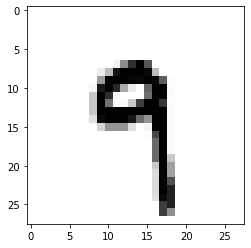

In [33]:
r = random.randint(0, len(mnist_test)-1) #범위 설정이 헷갈림 다시 공부
X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r+1].to(device)
print("Label:",Y_single_data.item())
single_prediction = linear(X_single_data)
print("Prediction:", torch.argmax(single_prediction,1).item())

plt.imshow(mnist_test.test_data[r:r+1].view(28,28),cmap="Greys",interpolation="nearest")
plt.show